# MATH 210 Introduction to Mathematical Computing

## March 24, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib inline

## Planetary orbits

Given an object with mass $M$, the magnitude of the force of gravity it exerts on another object with mass $m$ is

$$
F = \frac{GMm}{d^2}
$$

where $d$ is the distance between the objects. Let's consider the trajectory of a planet of mass $m$ as it orbits a star of mass $M$ (fixed in space). Let's use the following units:

* solar mass - multiples of the Sun's mass
* years
* AU - [astronomical unit](https://en.wikipedia.org/wiki/Astronomical_unit) is 149,597,870,700 metres (approximately the distance from the Earth to the Sun)

With these units, the [gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant) $G$ is $4 \pi^2$.

Let $\mathbf{p} = (x,y)$ be the position of the orbiting planet with the star fixed at the origin $(0,0)$, and let $m_P$ be the mass of the planet and let $m_S$ be the mass of the star. Starting with [Newton's Second](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion#Newton.27s_second_law), we have

$$
m_P \frac{d^2 \mathbf{p}}{dt^2} = \mathbf{F}
$$

wher $\mathbf{F}$ is the vector of total force acting on the planet (which is only due to gravity in this case). [Newton's law of gravity](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) states

$$
\mathbf{F} = - \frac{G m_S m_P}{ || \mathbf{p} ||^2 } \frac{\mathbf{p}}{ || \mathbf{p} || }
$$

where $|| \mathbf{p} || = \sqrt{x^2 + y^2}$ is distance between the star and the planet.

Putting these equations together, we obtain a 2-dimensional system of second-order differential equations

\begin{align}
\frac{d^2 x}{dt^2} &= - \frac{G m_S x }{ (x^2 + y^2)^{3/2} } \\
\frac{d^2 y}{dt^2} &= - \frac{G m_S y }{ (x^2 + y^2)^{3/2} }
\end{align}

Write the system as a first order system by introducing new variables: $u_0 = x$, $u_1 = x'$, $u_2 = y$ and $u_3 = y'$. The system becomes

\begin{align}
u_0' &= u_1 \\
u_1' &= - \frac{G m_S u_0 }{ (u_0^2 + u_2^2)^{3/2} } \\
u_2' &= u_3 \\
u_3' &= - \frac{G m_S u_2 }{ (u_0^2 + u_2^2)^{3/2} }
\end{align}

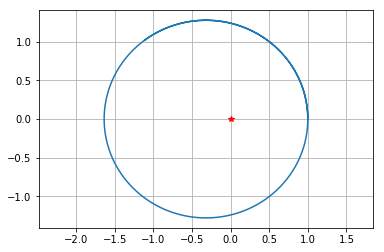

In [2]:
G = 4*np.pi**2 # Gravitational constant
m_star = 1 # Mass of the star
tf = 2 # Final time value, plot the solution for t in [0,tf]
u0 = [1,0,0,7] # Initial conditions: [x position, x speed, y position, y speed]

# Define the right side of system of ODEs
def f(u,t):
    dudt = [0,0,0,0]
    D3 = (u[0]**2 + u[2]**2)**(3/2)
    dudt[0] = u[1]
    dudt[1] = -G*m_star*u[0]/D3
    dudt[2] = u[3]
    dudt[3] = -G*m_star*u[2]/D3
    return dudt

# Compute the solution
t = np.linspace(0,tf,1000)
u = spi.odeint(f,u0,t)

# Plot the trajectory
# The columns of the output are (in order): x, x', y, y'
plt.plot(u[:,0],u[:,2],0,0,'r*')
plt.axis('equal'), plt.grid('on')
plt.show()

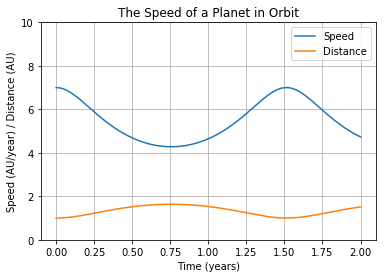

In [3]:
# Compute the speed (the norm of the velocity vector)
v = np.sqrt(u[:,1]**2 + u[:,3]**2)
# Compute the distance (the norm of the position vector)
d = np.sqrt(u[:,0]**2 + u[:,2]**2)

plt.plot(t,v,label='Speed')
plt.plot(t,d,label='Distance')
plt.grid('on'), plt.ylim([0,10])
plt.title('The Speed of a Planet in Orbit')
plt.xlabel('Time (years)'), plt.ylabel('Speed (AU/year) / Distance (AU)')
plt.legend()
plt.show()